In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


##**Installing Ultralytics**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 6.2 MB/s eta 0:00:00


In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


##**Importing football-players-detection datasets**

In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-4 in yolov5pytorch:: 100%|██████████| 522/522 [00:00<00:00, 2477.37it/s]


##**Train the YOLOv8 Model on the Custom dataset**

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/football-players-detection-4


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/football-players-detection-4/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/football-players-detection-4/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

In [ ]:
!ls {HOME}//runs/detect/train2

args.yaml					   PR_curve.png        train_batch781.jpg
confusion_matrix_normalized.png			   R_curve.png	       train_batch782.jpg
confusion_matrix.png				   results.csv	       val_batch0_labels.jpg
events.out.tfevents.1699346135.759879dc94af.926.0  results.png	       val_batch0_pred.jpg
F1_curve.png					   train_batch0.jpg    val_batch1_labels.jpg
labels_correlogram.jpg				   train_batch1.jpg    val_batch1_pred.jpg
labels.jpg					   train_batch2.jpg    weights
P_curve.png					   train_batch780.jpg


##**Displaying the confusion metrics**

/content


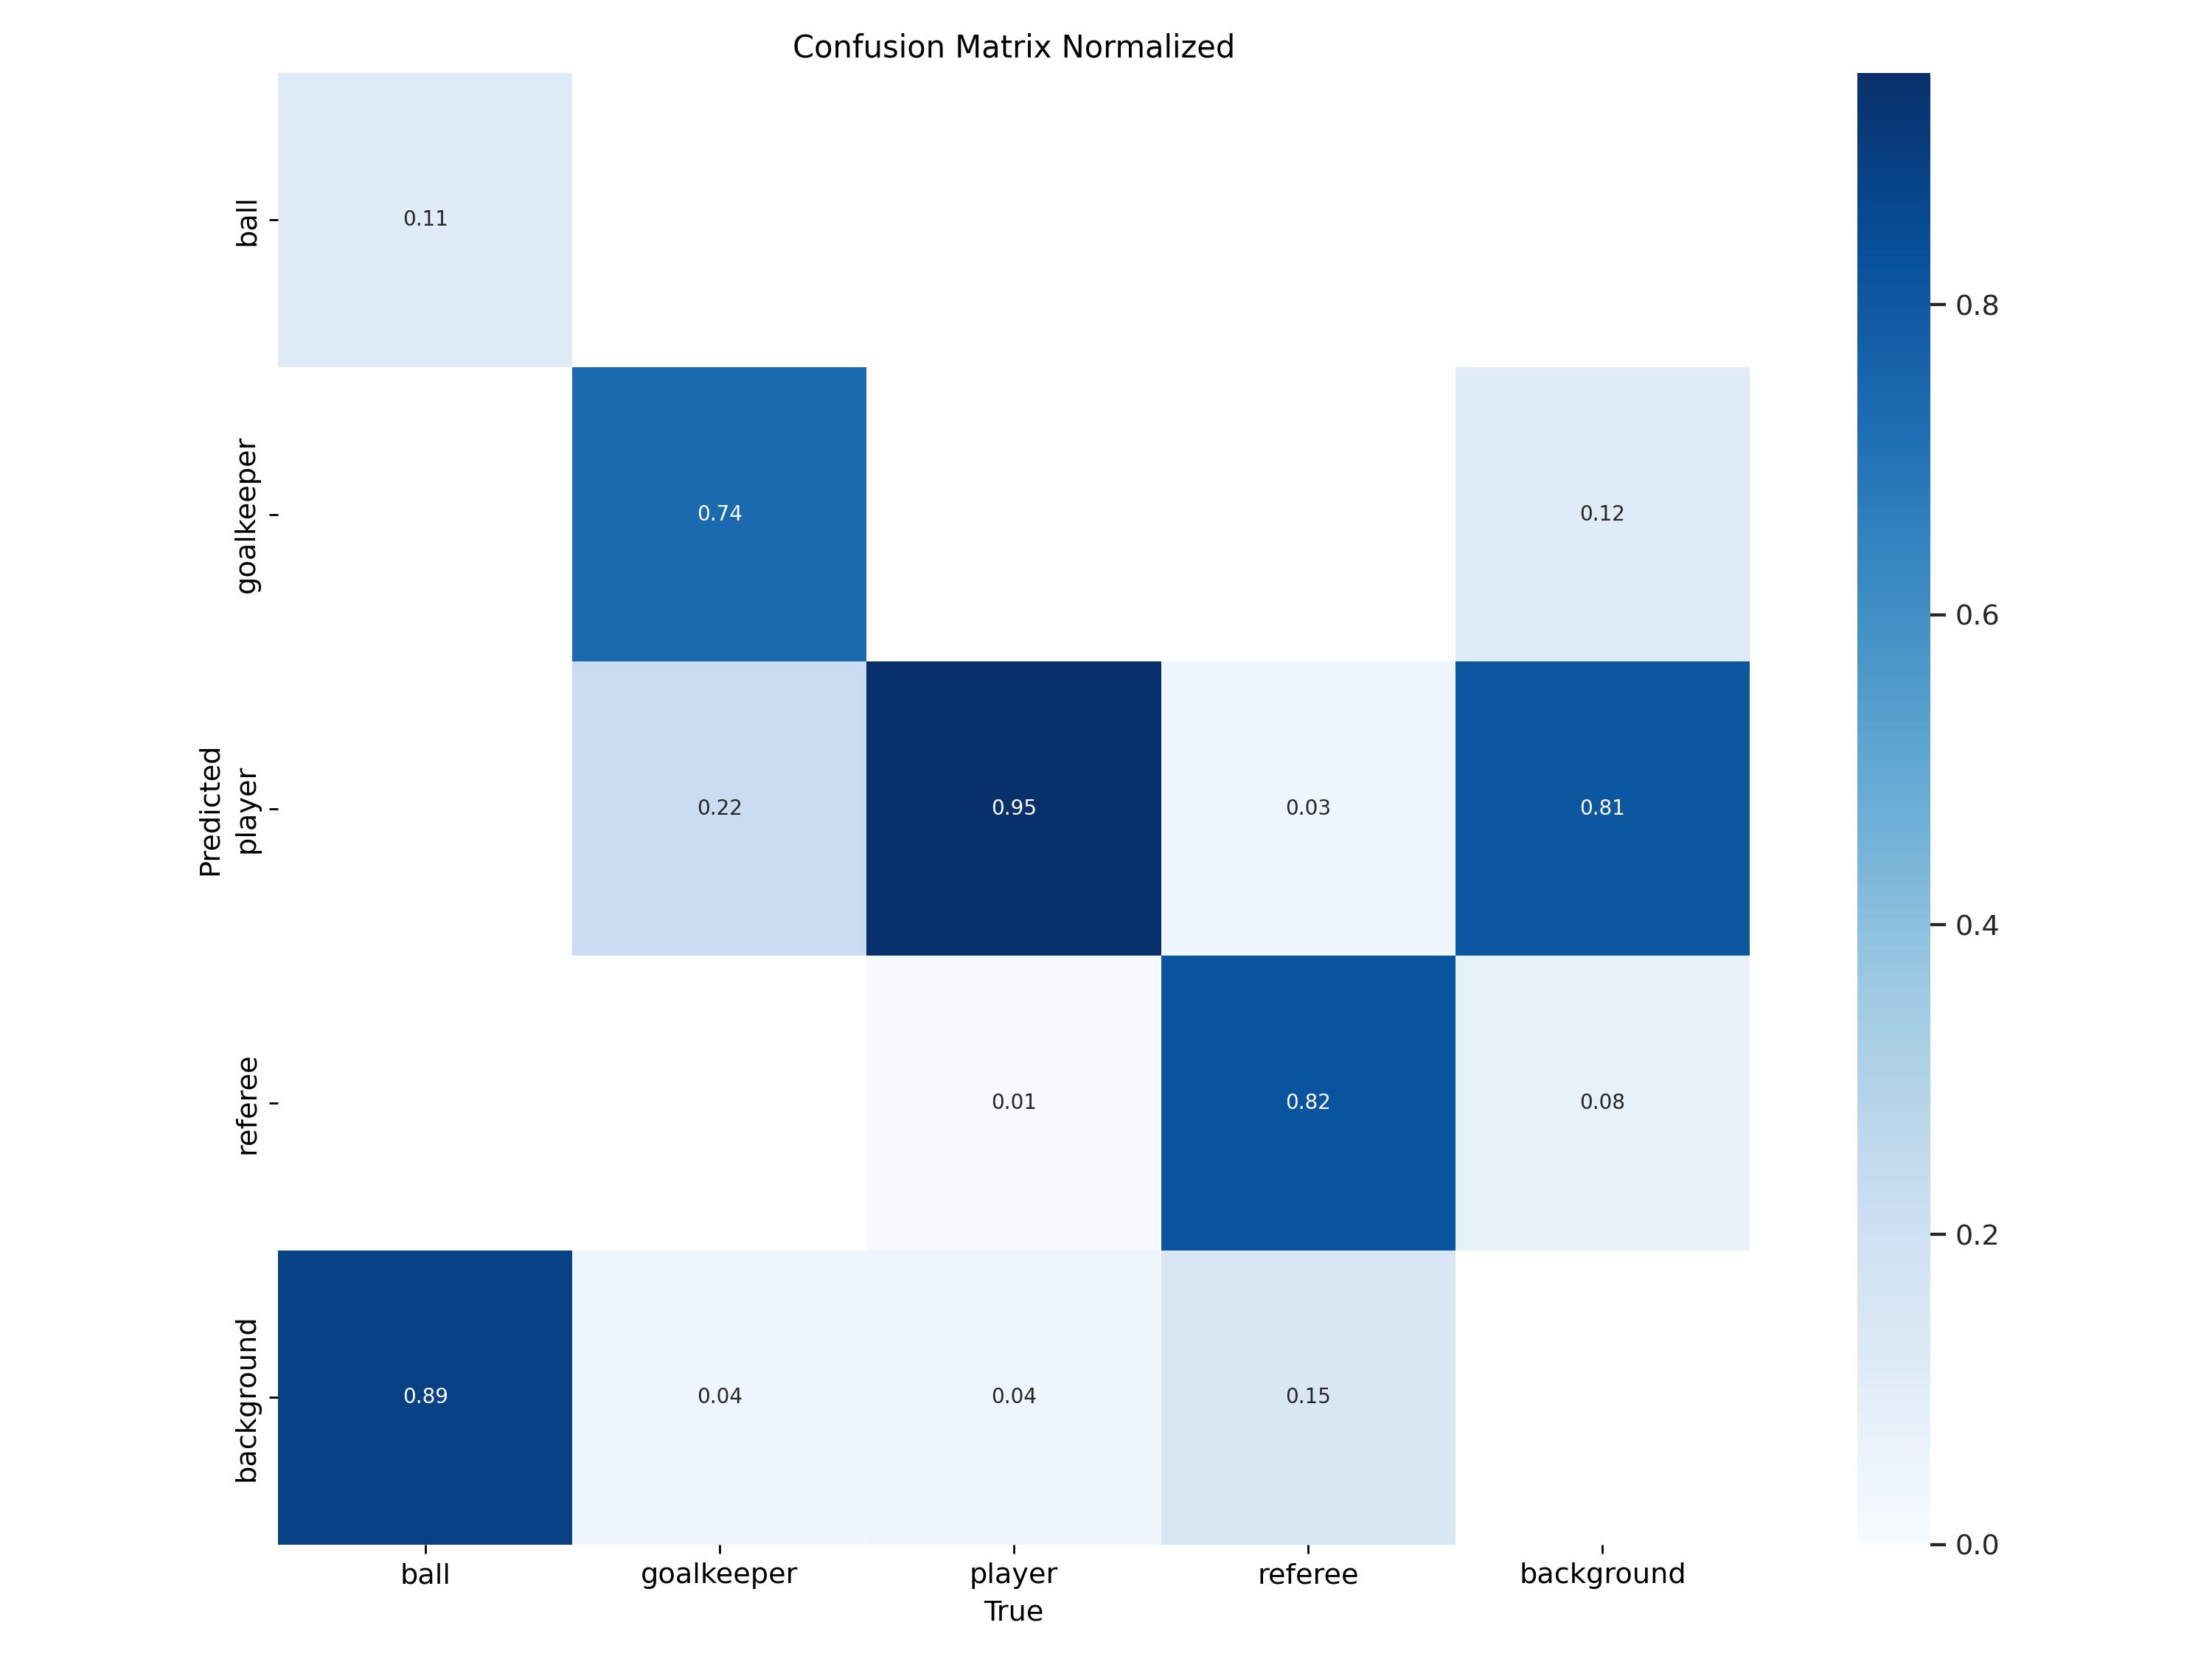

In [ ]:
%cd {HOME}
Image(filename = f'{HOME}//runs/detect/train2/confusion_matrix_normalized.png', width = 900)

##**Training and validation loss**

/content


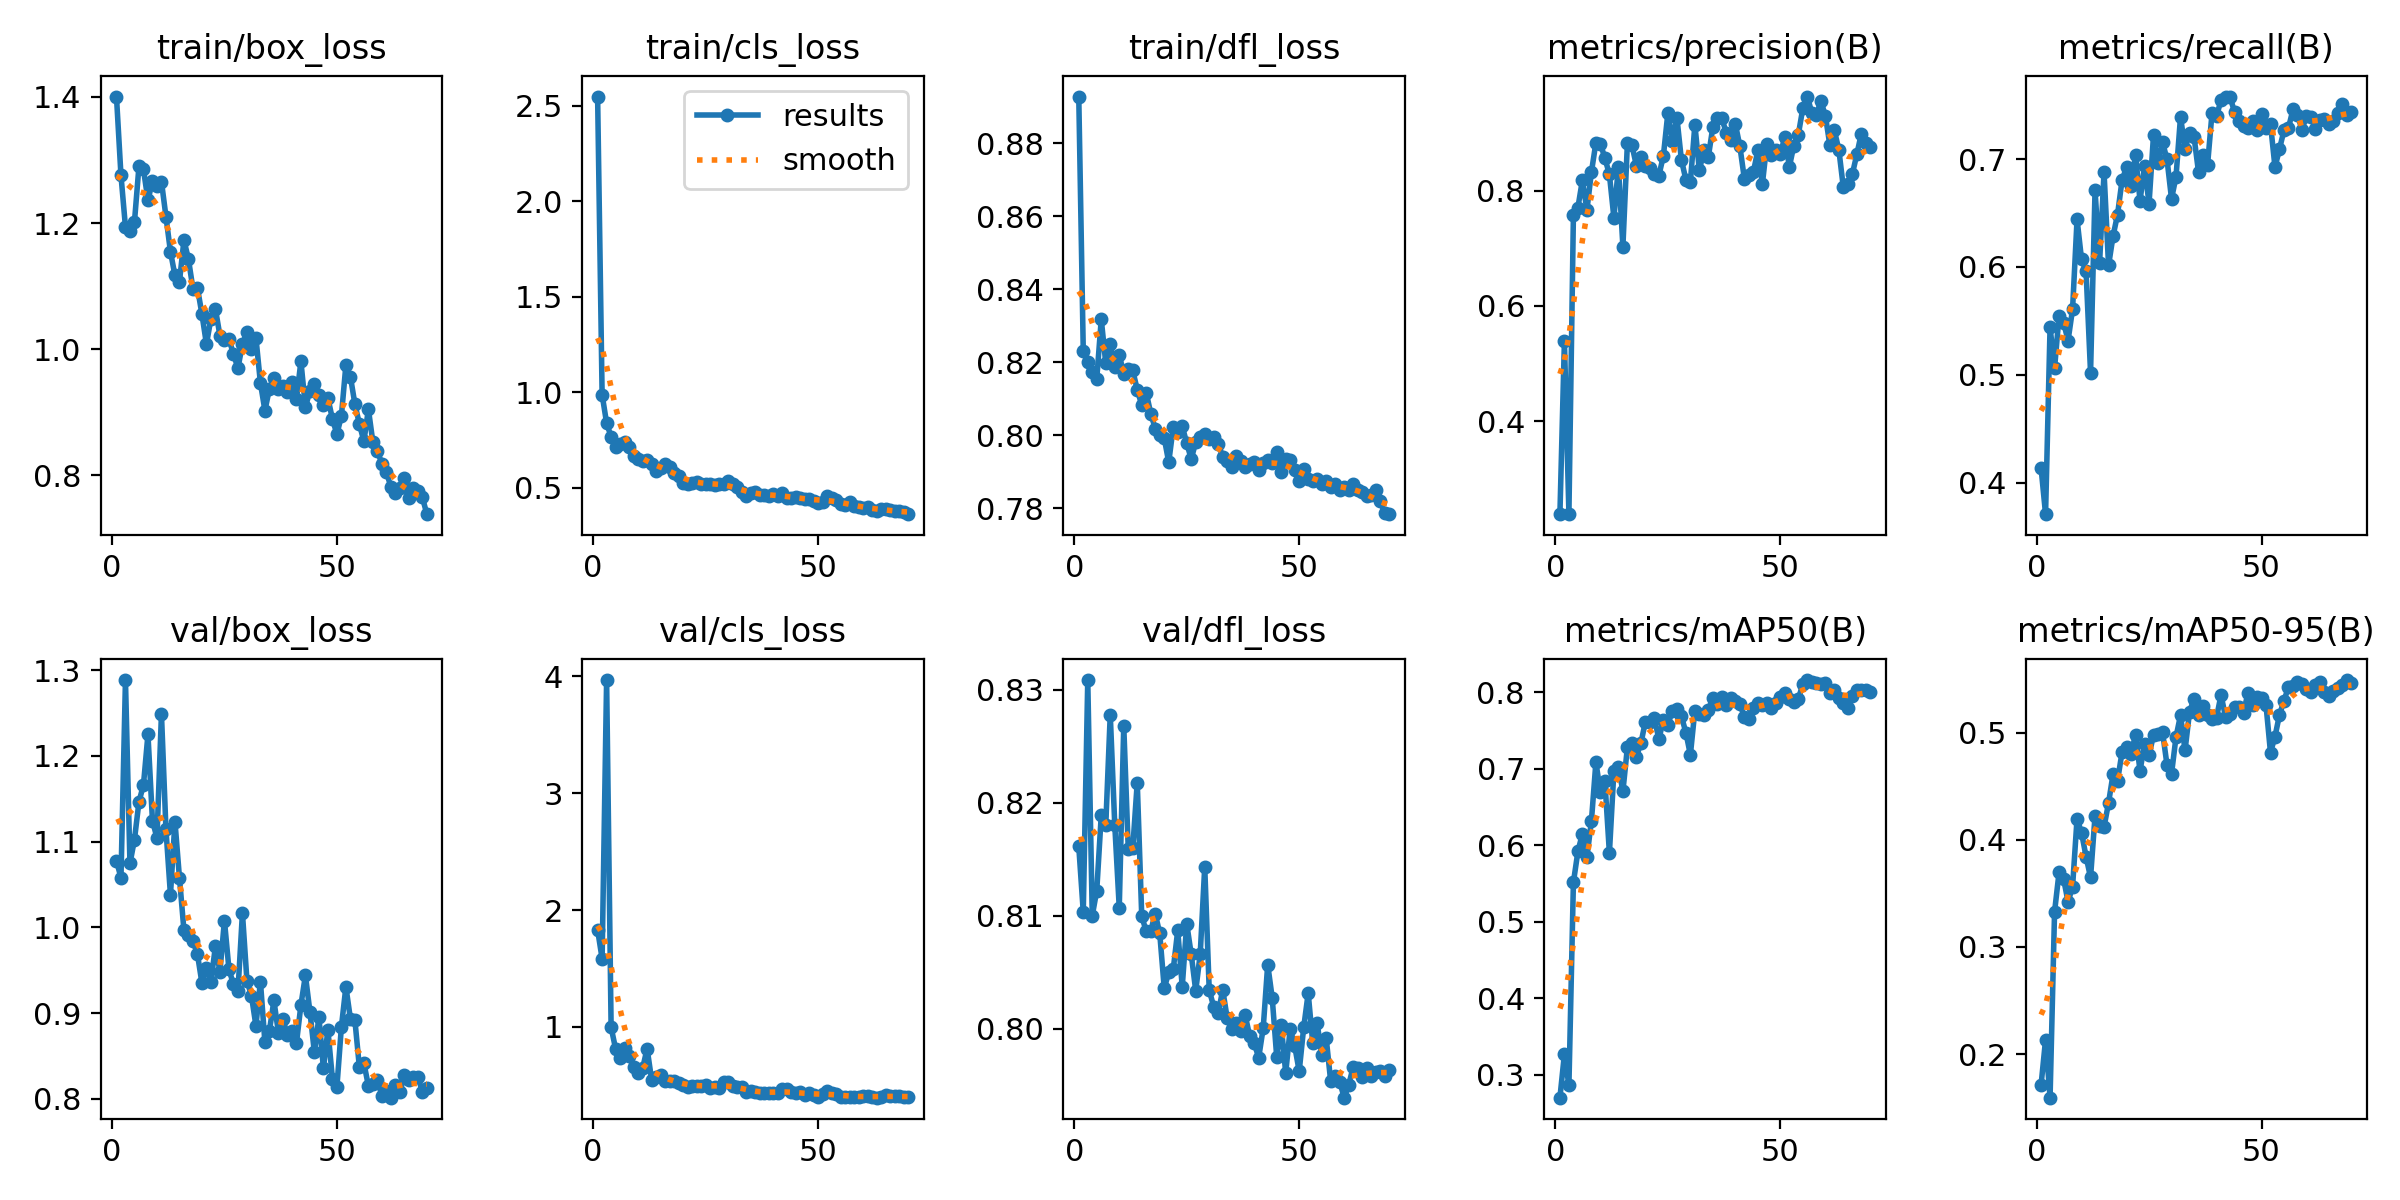

In [ ]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/results.png', width = 600)

/content


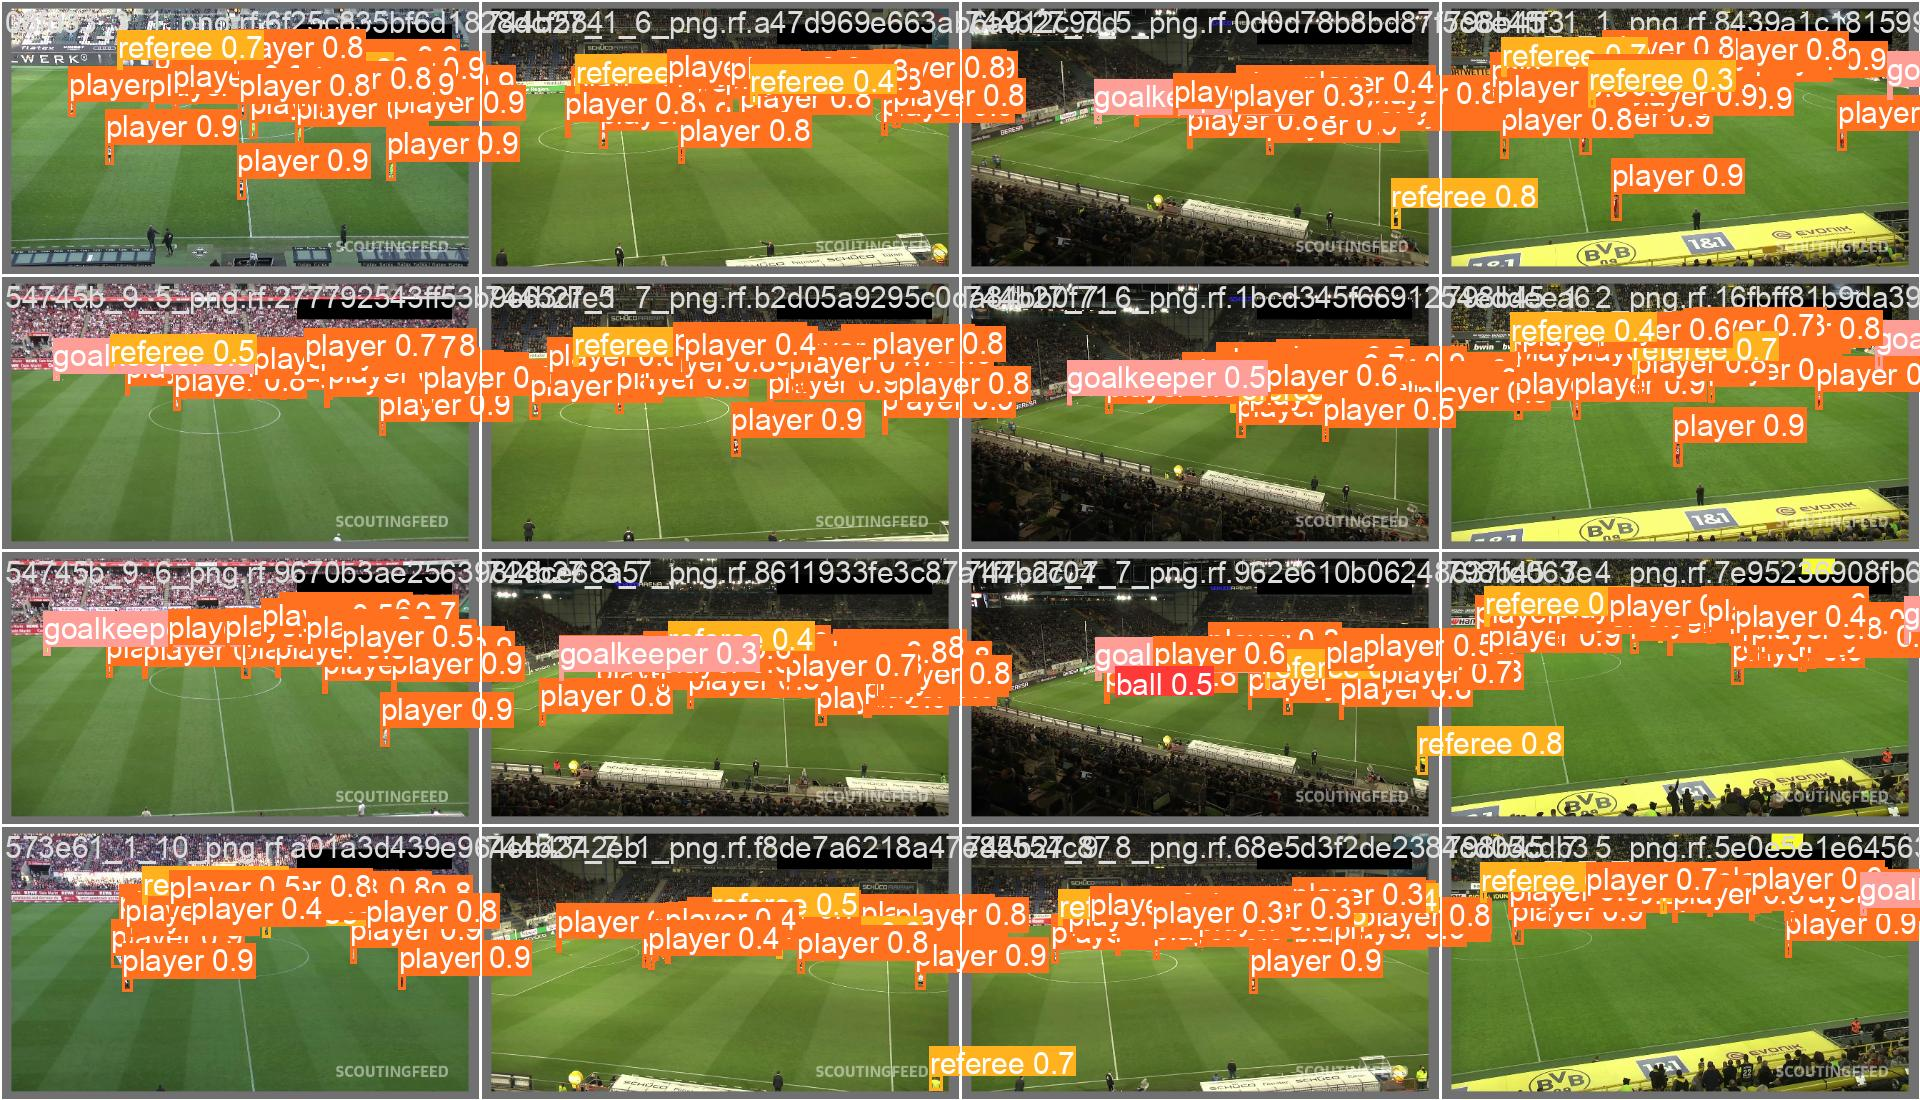

In [ ]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width = 600)

/content


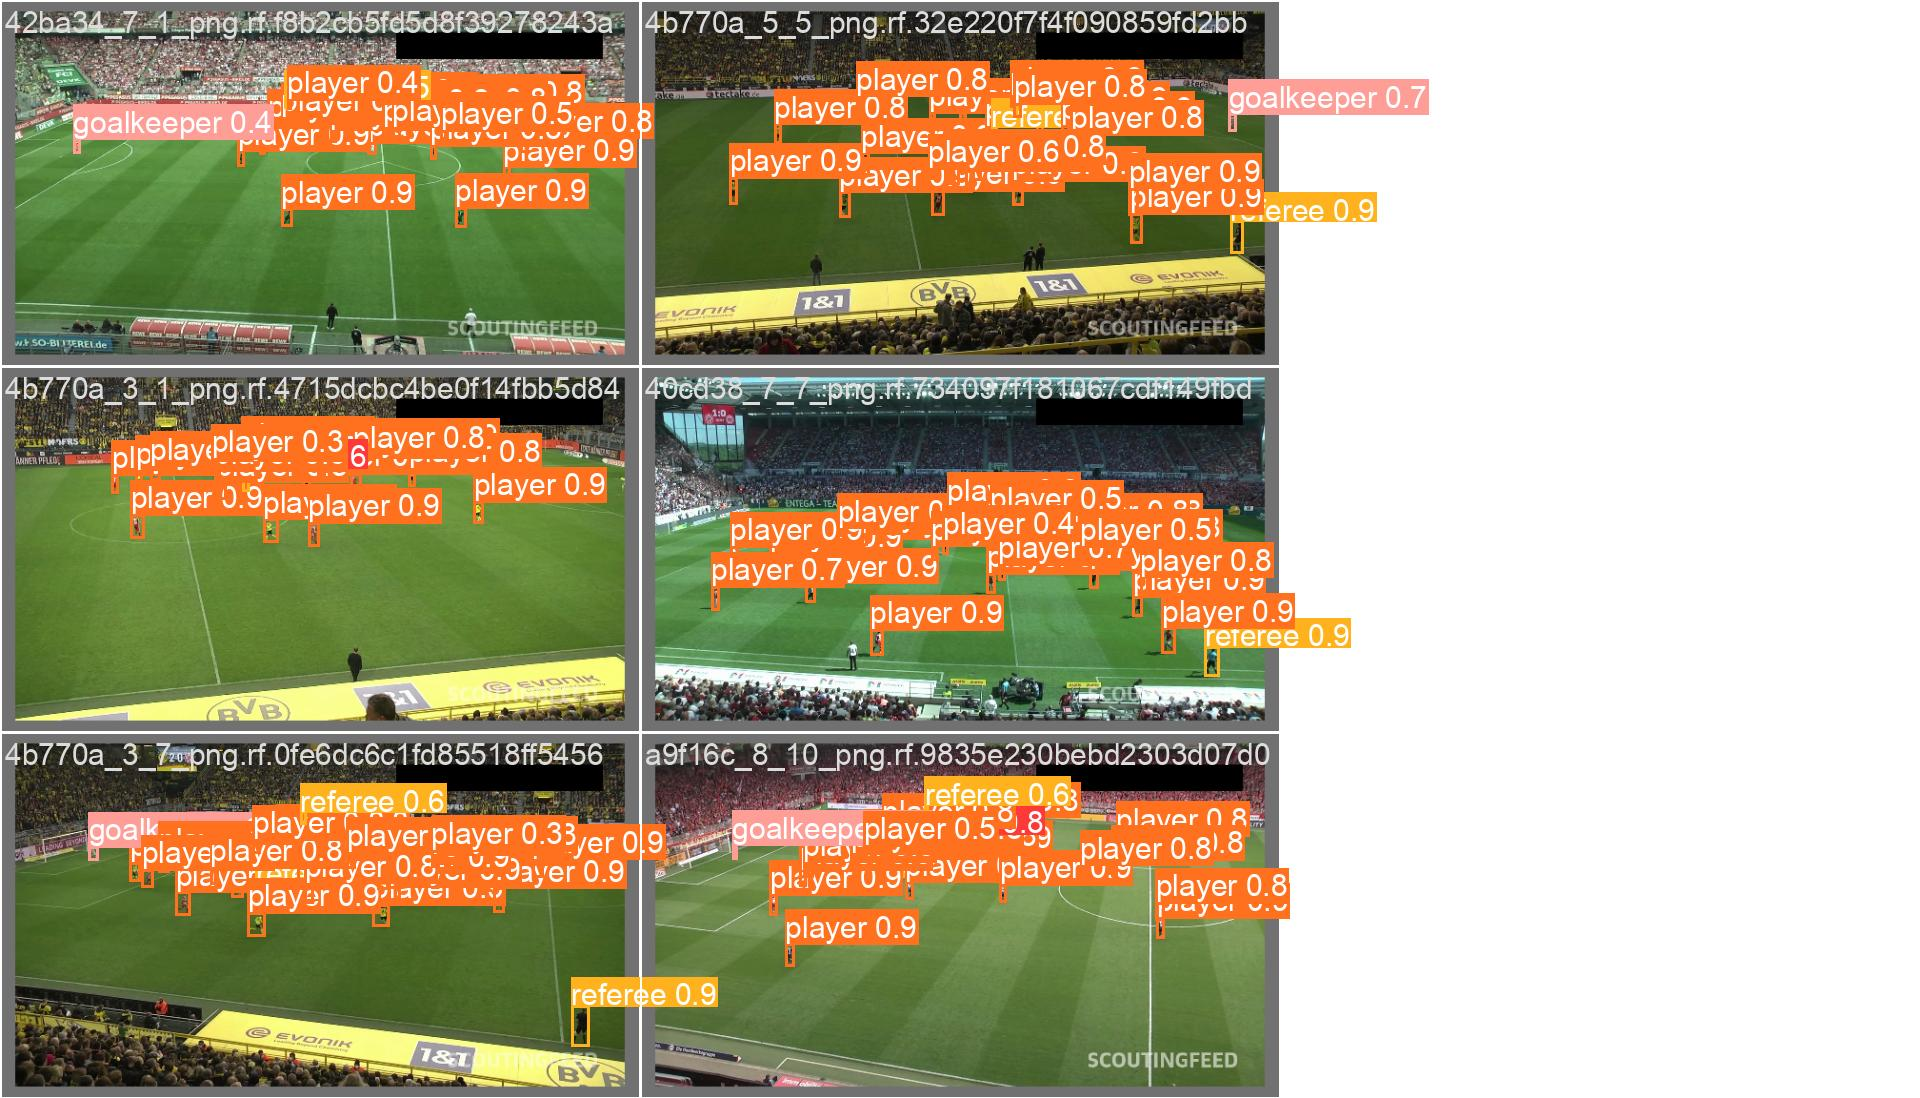

In [ ]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/val_batch1_pred.jpg', width = 600)

##**Validate custom model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/football-players-detection-4/data.yaml

/content
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/football-players-detection-4/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.41s/it]
                   all         38        905      0.883       0.74      0.803      0.549
                  ball         38         35      0.931        0.2      0.367       0.13
            goalkeeper         38         27      0.843      0.889      0.938      0.681
                player         38        754      0.918      0.963      0.979      0.773
               referee         38         89      0.839       0.91      0.927      0.612
Speed: 4.9ms preprocess, 31.3ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/

##**Inference with custom model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/football-players-detection-4/valid/images

/content
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/38 /content/datasets/football-players-detection-4/valid/images/08fd33_3_1_png.rf.6f25c835bf6d1828dcf584e5969b1f58.jpg: 384x640 19 players, 2 referees, 100.8ms
image 2/38 /content/datasets/football-players-detection-4/valid/images/08fd33_3_3_png.rf.128b8280598b9931fdeeed42b5be4c51.jpg: 384x640 20 players, 2 referees, 25.8ms
image 3/38 /content/datasets/football-players-detection-4/valid/images/08fd33_9_8_png.rf.cc61e7ba09940f4606e4464dd621fe2f.jpg: 384x640 21 players, 2 referees, 25.8ms
image 4/38 /content/datasets/football-players-detection-4/valid/images/121364_7_9_png.rf.bd5ceb93233525ef03fac0eae292f5ed.jpg: 384x640 18 players, 2 referees, 25.8ms
image 5/38 /content/datasets/football-players-detection-4/valid/images/121364_9_2_png.rf.400d952c966048709aa5b421889a4dba.jpg: 384x640 1 ball, 1 goalkeeper,

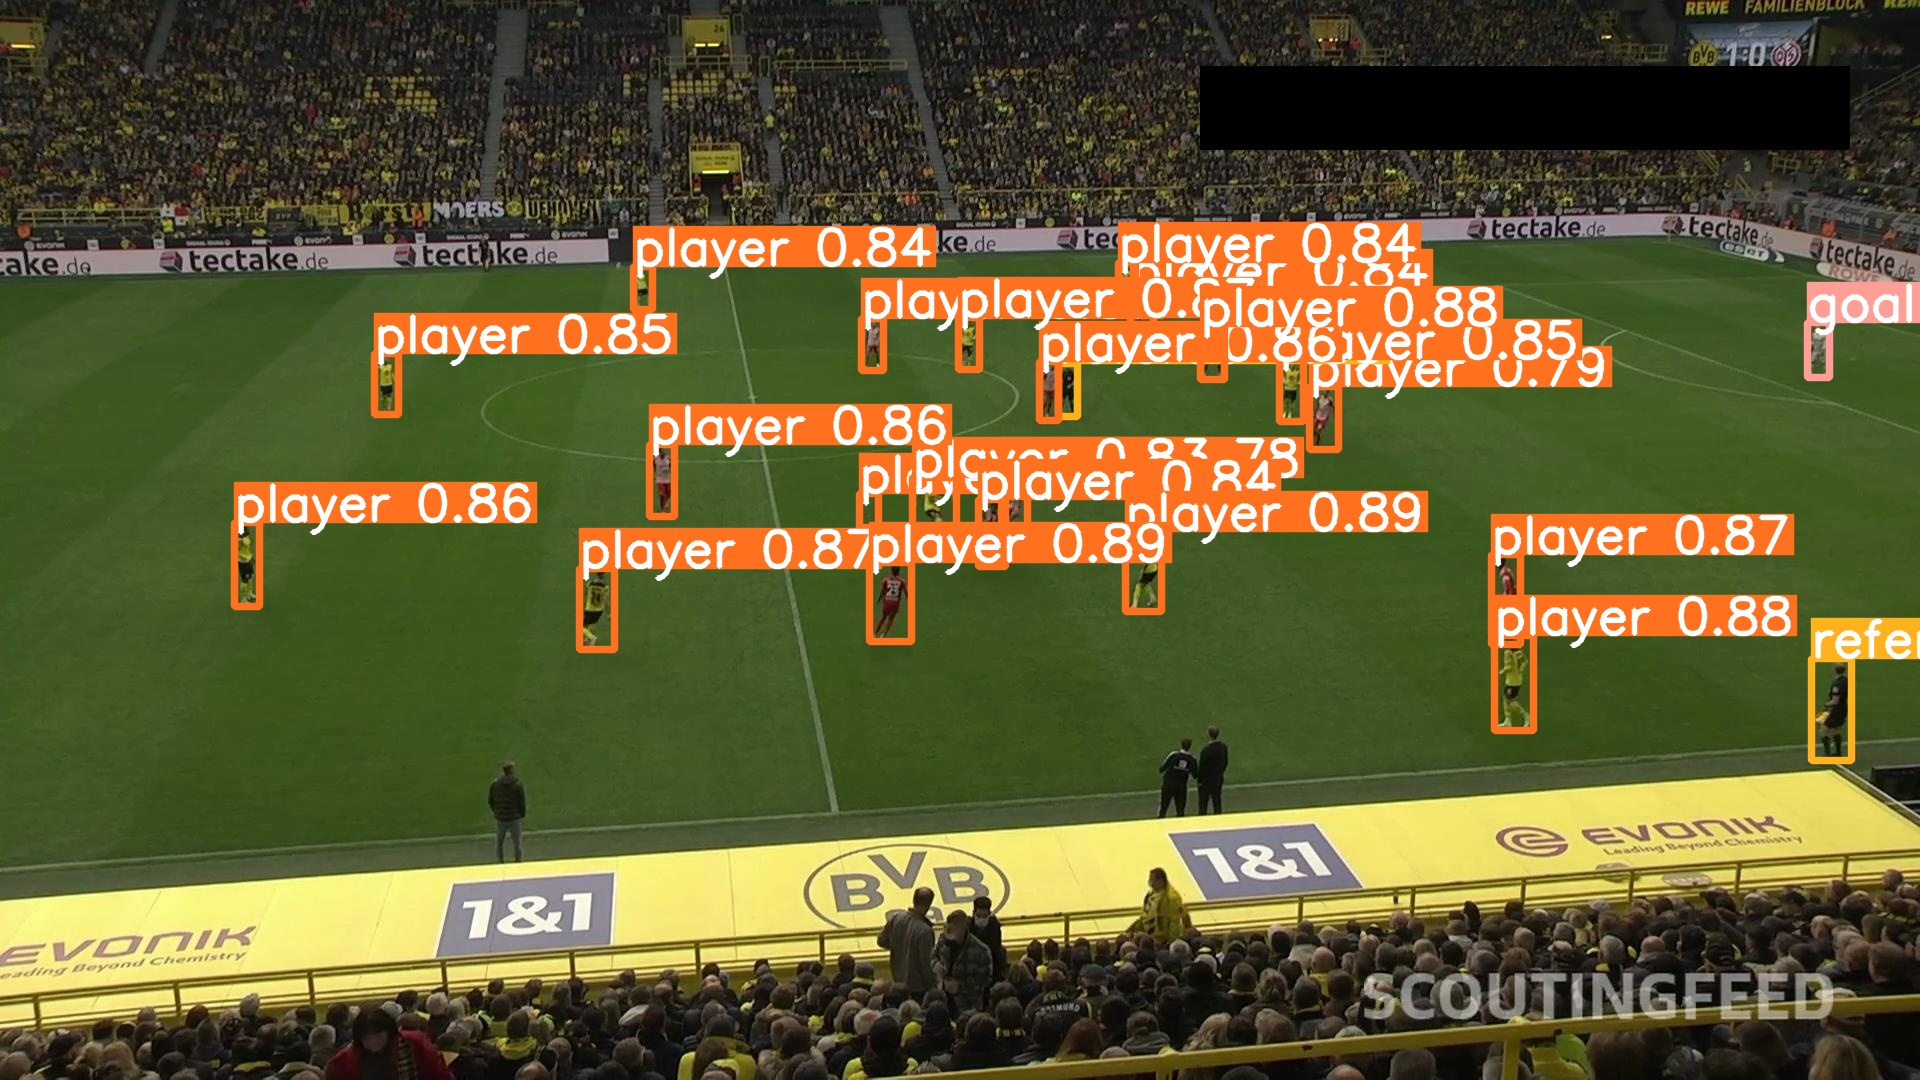

In [ ]:
Image('/content/runs/detect/predict/4b770a_5_5_png.rf.32e220f7f4f090859fd2bb2ba0c5d8d1.jpg')

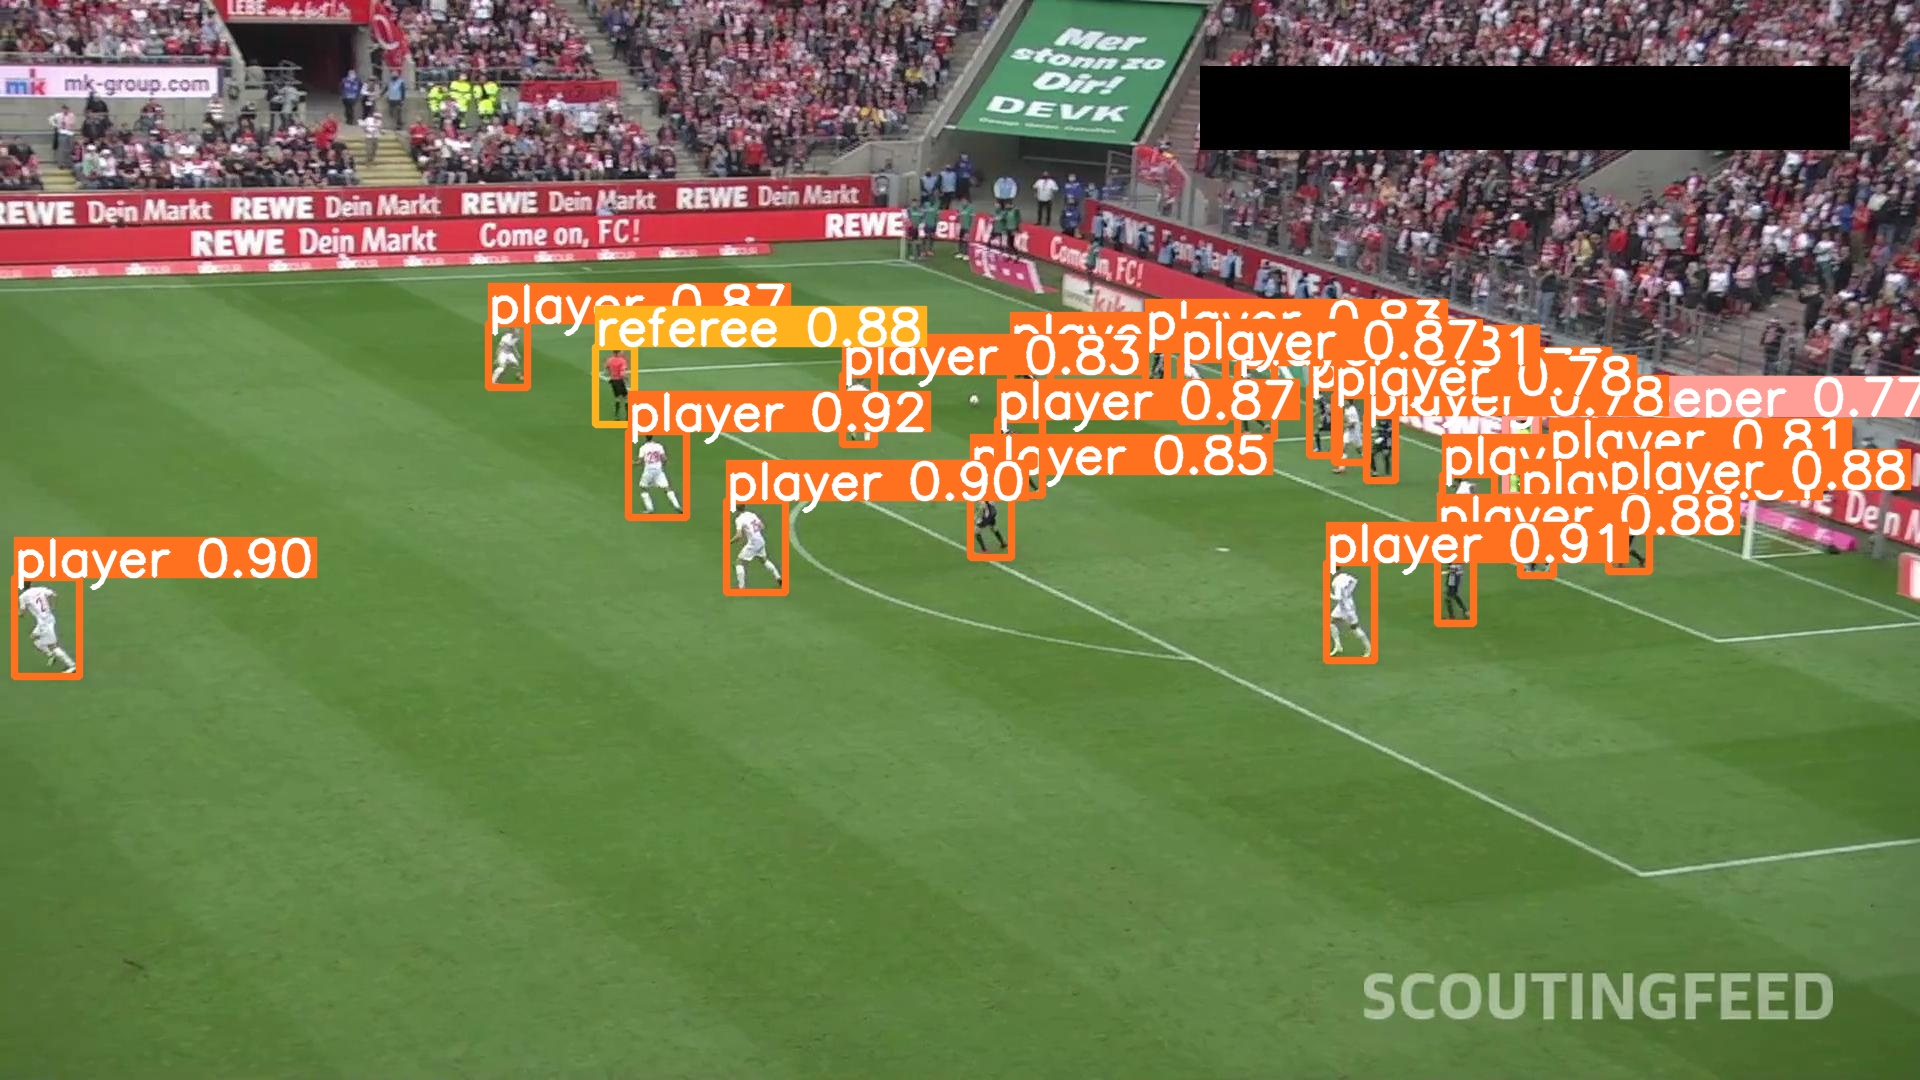

In [ ]:
Image('/content/runs/detect/predict/54745b_9_2_png.rf.459f3f85a7dab225b74601302e33d05b.jpg')

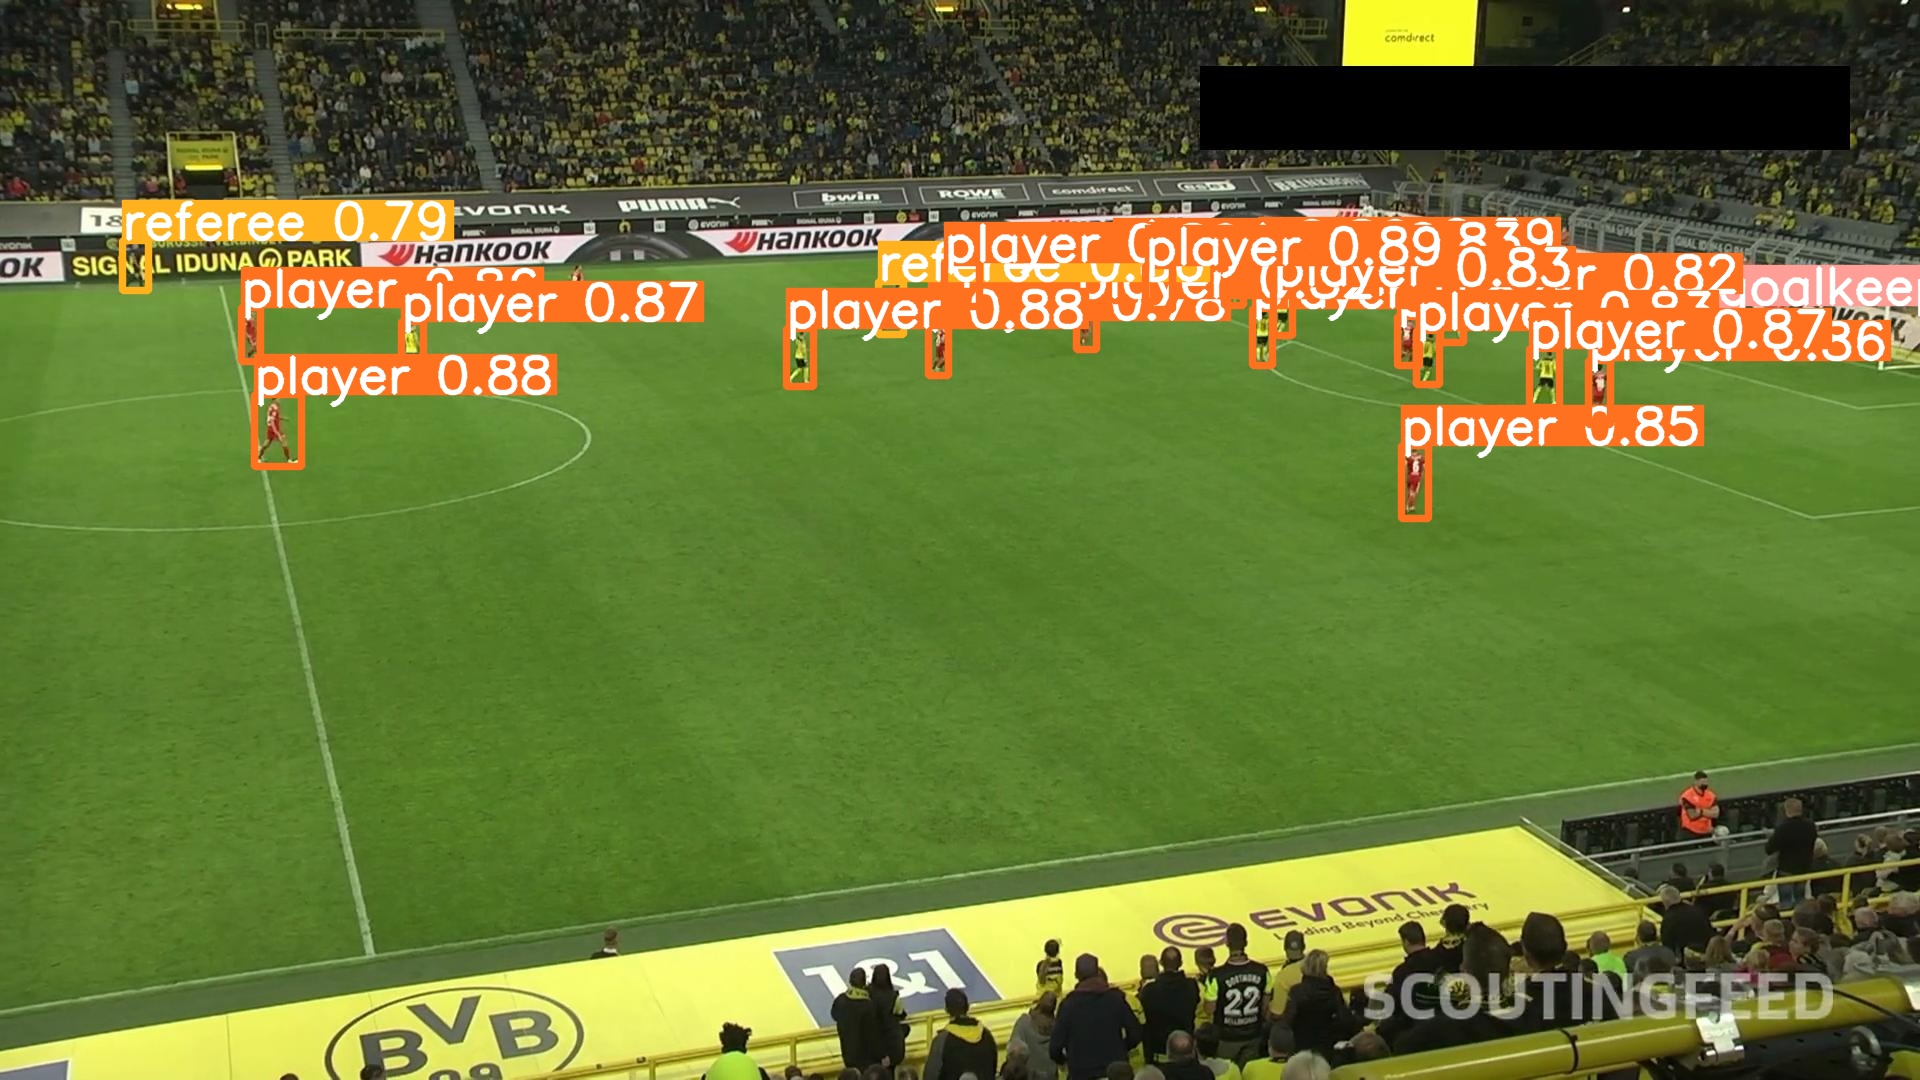

In [31]:
Image('/content/runs/detect/predict/798b45_7_5_png.rf.5e0e5e1e6456340e3fb21908d6e028d9.jpg')

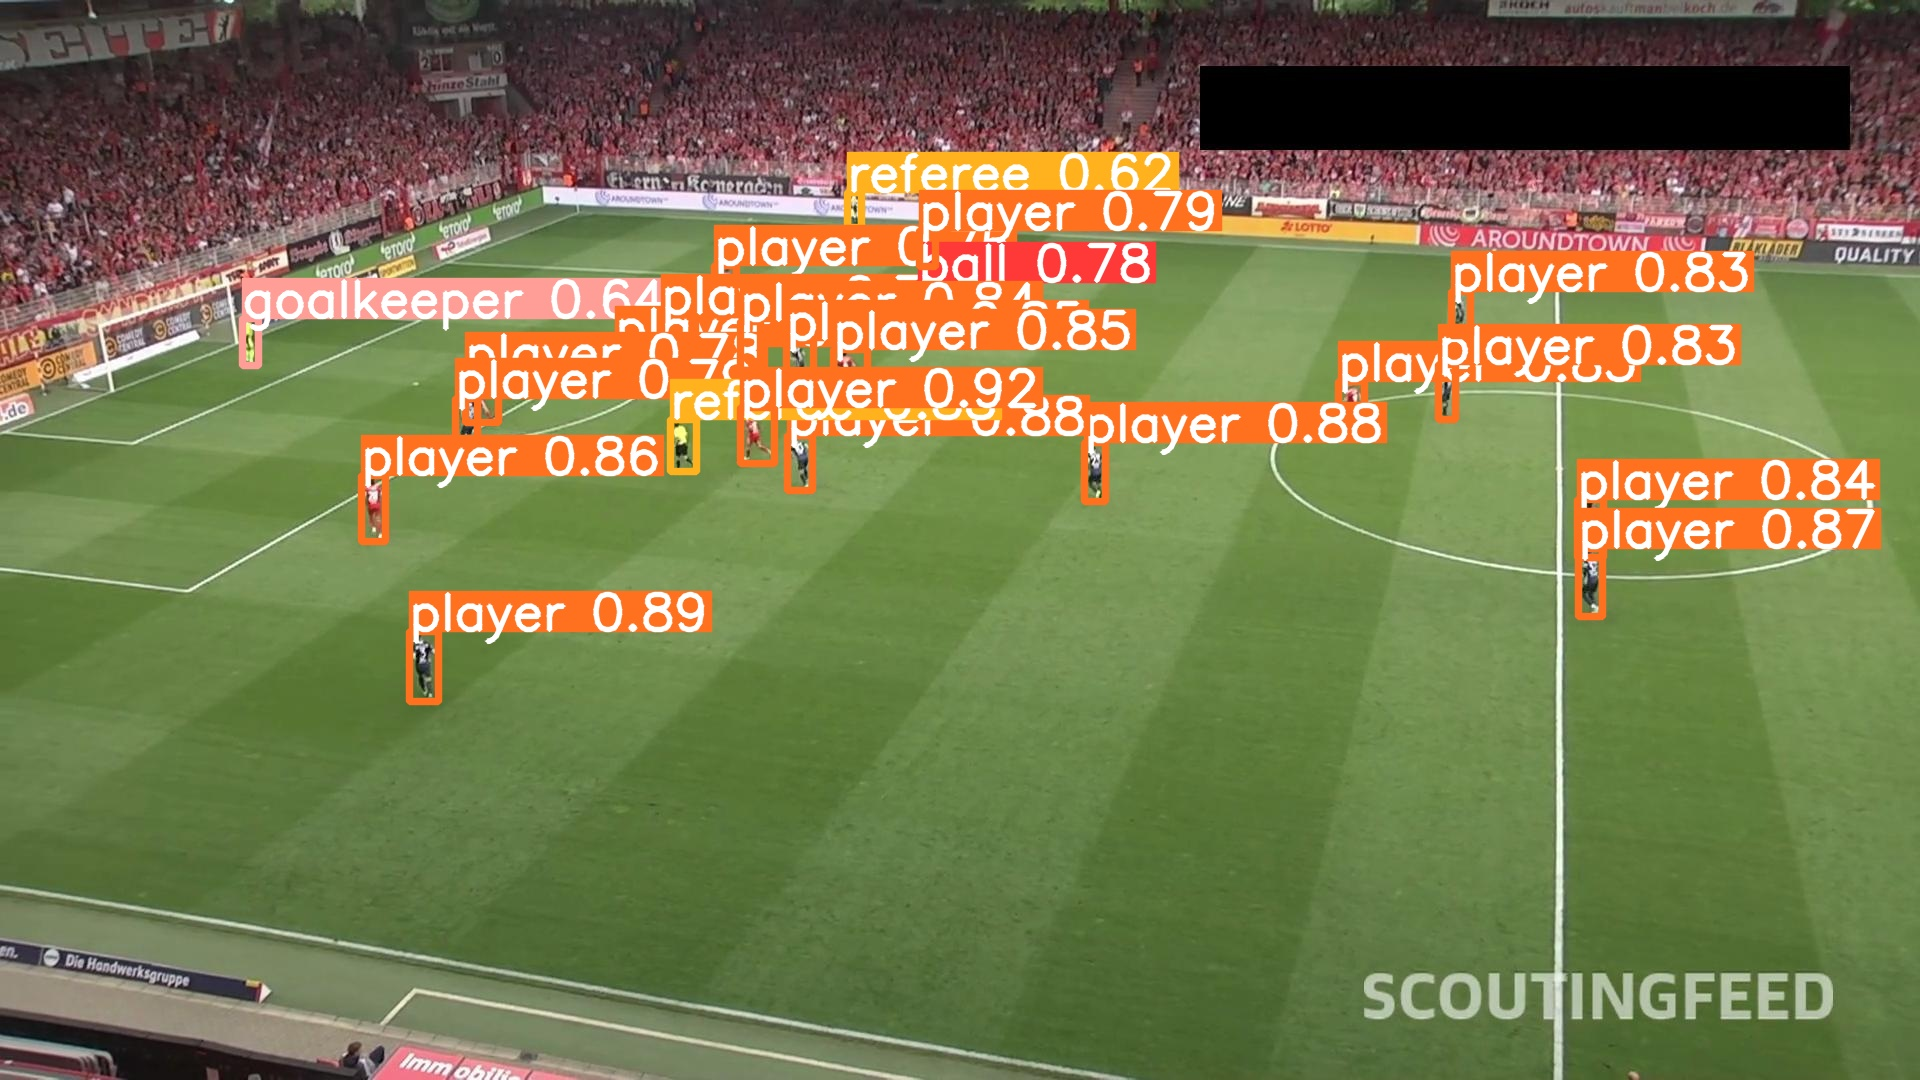

In [32]:
Image('/content/runs/detect/predict/a9f16c_8_10_png.rf.9835e230bebd2303d07d0147fe441dfa.jpg')

##**Detection on Custom Video**

In [33]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/1285) /content/demo.mp4: 384x640 1 goalkeeper, 16 players, 1 referee, 110.6ms
video 1/1 (2/1285) /content/demo.mp4: 384x640 1 goalkeeper, 16 players, 1 referee, 25.8ms
video 1/1 (3/1285) /content/demo.mp4: 384x640 1 goalkeeper, 15 players, 2 referees, 25.7ms
video 1/1 (4/1285) /content/demo.mp4: 384x640 1 goalkeeper, 16 players, 2 referees, 25.7ms
video 1/1 (5/1285) /content/demo.mp4: 384x640 1 goalkeeper, 16 players, 1 referee, 25.7ms
video 1/1 (6/1285) /content/demo.mp4: 384x640 1 goalkeeper, 16 players, 1 referee, 24.5ms
video 1/1 (7/1285) /content/demo.mp4: 384x640 1 goalkeeper, 17 players, 1 referee, 17.3ms
video 1/1 (8/1285) /content/demo.mp4: 384x640 1 goalkeeper, 20 players, 2 referees, 17.2ms
video 1/1 (9/1285) /content/demo.mp4: 384x640 1 goalkeeper, 24 players, 1 referee, 17.3ms
video 1

##**Display the video**

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)
